# Desafio Codenation - AceleraDev - Data Science

### Candidata: Cristiane Gea

### Desafio: Descubra as melhores notas de matemática do ENEM 2016

### Script feito no Google Colab

### Passo 1: Instalação dos pacotes necessários

In [0]:
import numpy as np
import pandas as pd
import plotly                         # "plotly" é a biblioteca que permite a visualização dos dados
import plotly.offline as py
import csv
import glob
from google.colab import files

In [0]:
# Configuração para exibição de todas as linhas e colunas dos itens solicitados
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
# Habilitação do modo offline (possibilita trabalhar sem estar na nuvem)
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)

### Passo 2: Importação dos dados

In [14]:
# Importação dos dados de treinamento

uploaded_train = files.upload()

Saving train.csv to train.csv


In [0]:
df_train = pd.read_csv('train.csv', sep="," , encoding="UTF8" )

In [16]:
# Inspeção dos dados importados

df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [17]:
# Visualizando colunas do arquivo importado

df_train.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [18]:
# Importação dos dados de teste

uploaded_test = files.upload()

Saving test.csv to test.csv


In [0]:
df_test = pd.read_csv('test.csv', sep="," , encoding="UTF8" )

In [20]:
# Inspeção dos dados importados

df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [21]:
# Visualizando colunas do arquivo importado

df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

### Passo 3: Inspeção dos dados

In [22]:
# Visualização da correlação das features com a coluna "NU_NOTA_MT" (objetivo)

df_train.corr()['NU_NOTA_MT'].dropna().sort_values(ascending=False)

NU_NOTA_MT                     1.000000
NU_NOTA_CN                     0.584941
NU_NOTA_CH                     0.529594
NU_NOTA_LC                     0.494695
NU_NOTA_REDACAO                0.379376
TP_DEPENDENCIA_ADM_ESC         0.373233
NU_NOTA_COMP3                  0.350307
NU_NOTA_COMP5                  0.343337
NU_NOTA_COMP4                  0.342282
NU_NOTA_COMP2                  0.335638
NU_NOTA_COMP1                  0.299402
CO_MUNICIPIO_NASCIMENTO        0.113416
CO_UF_NASCIMENTO               0.112236
CO_MUNICIPIO_PROVA             0.109433
CO_MUNICIPIO_RESIDENCIA        0.108850
CO_UF_PROVA                    0.108251
CO_UF_RESIDENCIA               0.107493
CO_MUNICIPIO_ESC               0.102517
CO_ESCOLA                      0.102072
CO_UF_ESC                      0.100935
CO_UF_ENTIDADE_CERTIFICACAO    0.086797
TP_ESCOLA                      0.069304
IN_DEFICIT_ATENCAO             0.060628
IN_SEM_RECURSO                 0.034406
Q035                           0.031685


In [0]:
# As colunas NU_NOTA_CN, NU_NOTA_CH e NU_NOTA_LC apresentaram maiores correlações


In [0]:
# Criação das colunas que serão utilizadas no modelo

colunas = [
    'CO_UF_RESIDENCIA',
    'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_COR_RACA',
    'TP_NACIONALIDADE',
    'TP_ST_CONCLUSAO',
    'TP_ANO_CONCLUIU',
    'TP_ESCOLA',
    'TP_ENSINO',
    'IN_TREINEIRO',
    'TP_DEPENDENCIA_ADM_ESC',
    'IN_BAIXA_VISAO',
    'IN_CEGUEIRA',
    'IN_SURDEZ',
    'IN_DISLEXIA',
    'IN_DISCALCULIA',
    'IN_SABATISTA',
    'IN_GESTANTE',
    'IN_IDOSO',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_LC',
    'CO_PROVA_CN',
    'CO_PROVA_CH',
    'CO_PROVA_LC',
    'CO_PROVA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'TP_LINGUA',
    'TP_STATUS_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
    'Q006',
    'Q024',
    'Q025',
    'Q026',
    'Q027',
    'Q047'
]

In [0]:
colunas_corr = [
    'NU_NOTA_MT',
    'CO_UF_RESIDENCIA',
    'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_COR_RACA',
    'TP_NACIONALIDADE',
    'TP_ST_CONCLUSAO',
    'TP_ANO_CONCLUIU',
    'TP_ESCOLA',
    'TP_ENSINO',
    'IN_TREINEIRO',
    'TP_DEPENDENCIA_ADM_ESC',
    'IN_BAIXA_VISAO',
    'IN_CEGUEIRA',
    'IN_SURDEZ',
    'IN_DISLEXIA',
    'IN_DISCALCULIA',
    'IN_SABATISTA',
    'IN_GESTANTE',
    'IN_IDOSO',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_LC',
    'CO_PROVA_CN',
    'CO_PROVA_CH',
    'CO_PROVA_LC',
    'CO_PROVA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'TP_LINGUA',
    'TP_STATUS_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
    'Q006',
    'Q024',
    'Q025',
    'Q026',
    'Q027',
    'Q047'
]

### Passo 4: Gráfico e tratamento dos valores nulos

In [26]:
# Pacotes necessários

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [27]:
# Identificação da quantidade de dados nulos no arquivo de treino

df_train[colunas].isnull().sum()

CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATUS_REDACAO         3597
NU_NOTA_

In [0]:
# NU_NOTA_CN, NU_NOTA_CH e NU_NOTA_LC apresentaram bastante quantidade de valores nulos

# Lembrete: NU_NOTA_CN, NU_NOTA_CH e NU_NOTA_LC apresentaram as maiores correlações com relação a NU_NOTA_MT

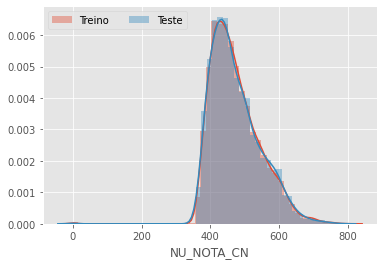

In [29]:
# Visualização dos campos nulos do arquivo treino de NU_NOTA_CN

x0 = df_train['NU_NOTA_CN']
x1 = df_test['NU_NOTA_CN']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left')

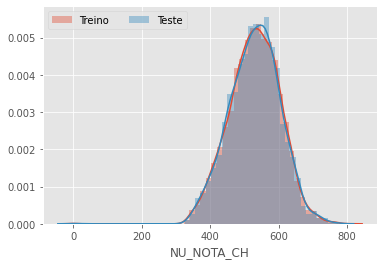

In [30]:
# Visualização dos campos nulos do arquivo treino de NU_NOTA_CH

x0 = df_train['NU_NOTA_CH']
x1 = df_test['NU_NOTA_CH']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left')

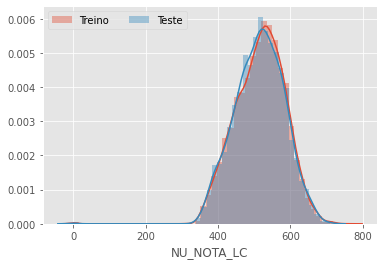

In [31]:
# Visualização dos campos nulos do arquivo treino de NU_NOTA_LC

x0 = df_train['NU_NOTA_LC']
x1 = df_test['NU_NOTA_LC']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left')

In [0]:
# Substituição dos valores nulos por zero

df_train = df_train.fillna(0)

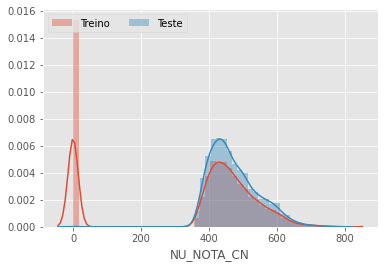

In [33]:
# Visualização o arquivo treino de NU_NOTA_CN após ajuste dos valores nulos

x0 = df_train['NU_NOTA_CN']
x1 = df_test['NU_NOTA_CN']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left')

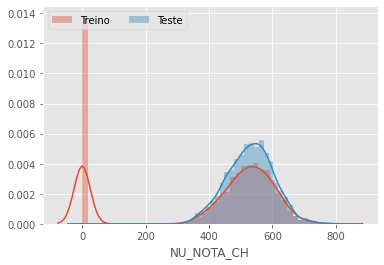

In [34]:
# Visualização o arquivo treino de NU_NOTA_CH após ajuste dos valores nulos

x0 = df_train['NU_NOTA_CH']
x1 = df_test['NU_NOTA_CH']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left')

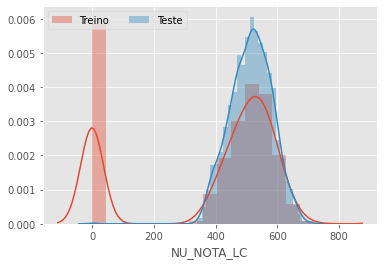

In [35]:
# Visualização o arquivo treino de NU_NOTA_LC após ajuste dos valores nulos

x0 = df_train['NU_NOTA_LC']
x1 = df_test['NU_NOTA_LC']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left')

In [36]:
# Repetindo o processo para dados de teste (Identificação da quantidade de dados nulos)

df_test[colunas].isnull().sum()

CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 3096
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    3096
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                1134
NU_NOTA_CH                1134
NU_NOTA_LC                1199
TP_LINGUA                    0
TP_STATUS_REDACAO         1199
NU_NOTA_

In [0]:
# Substituição dos valores nulos por zero

df_test = df_test.fillna(0)

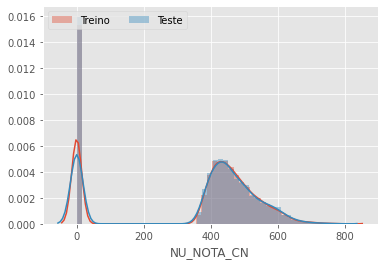

In [38]:
# Visualização dos dados de NU_NOTA_CN após ajuste dos valores nulos de treino e de teste

x0 = df_train['NU_NOTA_CN']
x1 = df_test['NU_NOTA_CN']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left')

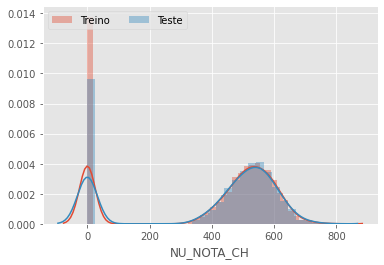

In [39]:
# Visualização dos dados de NU_NOTA_CH após ajuste dos valores nulos de treino e de teste

x0 = df_train['NU_NOTA_CH']
x1 = df_test['NU_NOTA_CH']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left')

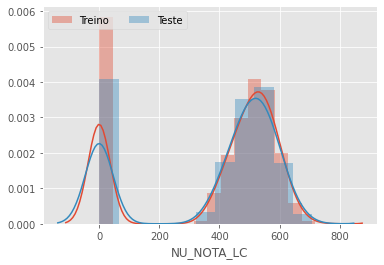

In [40]:
# Visualização dos dados de NU_NOTA_LC após ajuste dos valores nulos de treino e de teste

x0 = df_train['NU_NOTA_LC']
x1 = df_test['NU_NOTA_LC']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left')

### Passo 5: Normalização e separação dos dados

In [0]:
# Normalização dos dados de treinamento (identificação dos campos OBJECT e transformação dos campos do tipo OBJECT em FLOAT)

train_colunas_do_tipo_objeto = df_train.select_dtypes(include=[object]).columns

In [0]:
# Normalização dos dados de teste  (identificação dos campos OBJECT e transformação dos campos do tipo OBJECT em FLOAT)

test_colunas_do_tipo_objeto = df_test.select_dtypes(include=[object]).columns

In [0]:
# Separação das notas de matemática do arquivo de treinamento

y_train = df_train['NU_NOTA_MT']

In [0]:
# Separação de todas as colunas do arquivo de treinamento

x_train = df_train[colunas]

In [0]:
# Separação de todas as colunas do arquivo de teste

x_test = df_test[colunas]

In [46]:
# Tratmento de cada campo do tipo OBJECT

from sklearn.preprocessing import LabelEncoder

y_train_encoder = LabelEncoder().fit_transform(y_train)

for coluna in train_colunas_do_tipo_objeto:
  if coluna in colunas and coluna != 'NU_INSCRICAO':
    x_train[coluna] = LabelEncoder().fit_transform(x_train[coluna].astype(str))

for coluna in test_colunas_do_tipo_objeto:
  if coluna in colunas and coluna != 'NU_INSCRICAO':
    x_test[coluna] = LabelEncoder().fit_transform(x_test[coluna].astype(str))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
# Importação dos scalers e aplicação nos dados para aumentar a velocidade de processamento.

from sklearn.preprocessing import RobustScaler, StandardScaler
sc = StandardScaler()
rb = StandardScaler()
x_train_scaler = sc.fit_transform(x_train)  
x_test_scaler = sc.transform(x_test)

### Passo 6: Criação dos modelos de regressão

In [48]:
# Treinando o modelo de regressão

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Utilização da técnica de previsão AdaBoost

# AdaBoost é uma combinação das ideias de Bagging e Boosting e não exige um grande conjunto de treinamento como os outros dois. Inicialmente, cada exemplo de formação de um determinado conjunto de treinamento tem o mesmo peso.

ada = AdaBoostRegressor()

# Criação de um pipeline de transformação dos dados (para que ficassem prontos para o algoritmo)
clf = Pipeline([('scaler', sc), ('ada', ada)])

# Utilização do conceito de Pipeline com RandomizedSearchCV para realizar vários testes de regressão e identificar os melhores parâmetros para o meu modelo alcançar ou chegar o mais próximo de 100%

# Parâmetros e variações do Regressor a serem aplicados pelo RandomizedSearchCV 
random_grid = {
    'ada__base_estimator': [DecisionTreeRegressor(max_depth=8), DecisionTreeRegressor(max_depth=3)],
    'ada__random_state': [0, 42],
    'ada__loss': ['linear','square','exponential'],
    'ada__n_estimators': [10, 20, 50, 100, 200]
}

search = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 20, cv = 5, verbose = 10,
                            n_jobs = -1)

# Execução do processo usando dados de Treino para treinar o modelo
results = search.fit(x_train, y_train)

# Exibição dos melhores parâmetros juntamente com o percentual de acerto.
results.best_score_, results.best_params_, results.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.8min finished


(0.9217475427040231,
 {'ada__base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
  'ada__loss': 'linear',
  'ada__n_estimators': 20,
  'ada__random_state': 42},
 Pipeline(memory=None,
          steps=[('scaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('ada',
                  AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                         criterion='mse',
                                                                         max_depth=8,
                                                

In [0]:
# Taxa de acurácia do modelo de treino: 92,17%

In [0]:
# Aplicação do modelo aos dados de teste

from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                         criterion='mse',
                                                                         max_depth=8,
                                                                         max_features=None,
                                                                         max_leaf_nodes=None,
                                                                         min_impurity_decrease=0.0,
                                                                         min_impurity_split=None,
                                                                         min_samples_leaf=1,
                                                                         min_samples_split=2,
                                                                         min_weight_fraction_leaf=0.0,
                                                                         presort='deprecated',
                                                                         random_state=None,
                                                                         splitter='best'),
                                    learning_rate=1.0, loss='exponential',
                                    n_estimators=10, random_state=0)

# Ajustamento do modelo com dados de teste:
ada.fit(x_train_scaler, y_train_encoder)

# Previsão da nota da prova de matemática de quem participou do ENEM 2016:
y_pred_test = ada.predict(x_test_scaler)
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = df_test.NU_INSCRICAO
answer['NU_NOTA_MT'] = y_pred_test
answer.to_csv('answer.csv', index=False)

In [51]:
# Teste auxiliar para identificar a acurrácia do modelo usando cross_validation.

from sklearn.model_selection import cross_val_score
scores = cross_val_score(ada, x_test_scaler, y_pred_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.97780235 0.97876015 0.97746329 0.97971457 0.97697498]
Accuracy: 0.98 (+/- 0.00)
